# 🚨 Detección de Anomalías en la Cadena de Suministro
Este cuaderno detecta comportamientos anómalos en variables operativas que podrían indicar **fraudes** o **fallas logísticas**, mediante algoritmos de detección no supervisada como **Isolation Forest** y **Local Outlier Factor (LOF)**.

## 📚 Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

## 📂 Paso 2: Cargar archivo con datos de la cadena de suministro

In [2]:
from google.colab import files
import io

uploaded = files.upload()
for archivo in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded[archivo]))
df.head()

Saving datos_cadena_suministro_anomalias.csv to datos_cadena_suministro_anomalias.csv


,ID_Transaccion,Tiempo_Entrega,Costo_Transporte,Cantidad_Entregada,Distancia_km
0,TXN_0001,53.0,57409.420000,121.000000,238.9
1,TXN_0002,111.6,155723.871346,48.760158,172.4
2,TXN_0003,54.5,38811.460000,101.000000,159.1
3,TXN_0004,63.2,54503.750000,90.000000,199.8
4,TXN_0005,45.7,44794.860000,110.000000,191.5


## 📊 Paso 3: Análisis exploratorio

In [3]:
df.describe()

,Tiempo_Entrega,Costo_Transporte,Cantidad_Entregada,Distancia_km
count,500.000000,500.000000,500.000000,500.000000
mean,50.243800,51926.772977,99.585927,201.659200
std,16.324194,13282.723428,18.684921,49.204576
min,15.600000,28424.910000,25.094577,53.000000
25%,41.200000,45353.865000,90.000000,169.400000
50%,48.550000,50416.985000,101.000000,199.550000
75%,54.900000,55721.337500,111.000000,234.950000
max,158.000000,161133.367433,139.000000,359.700000


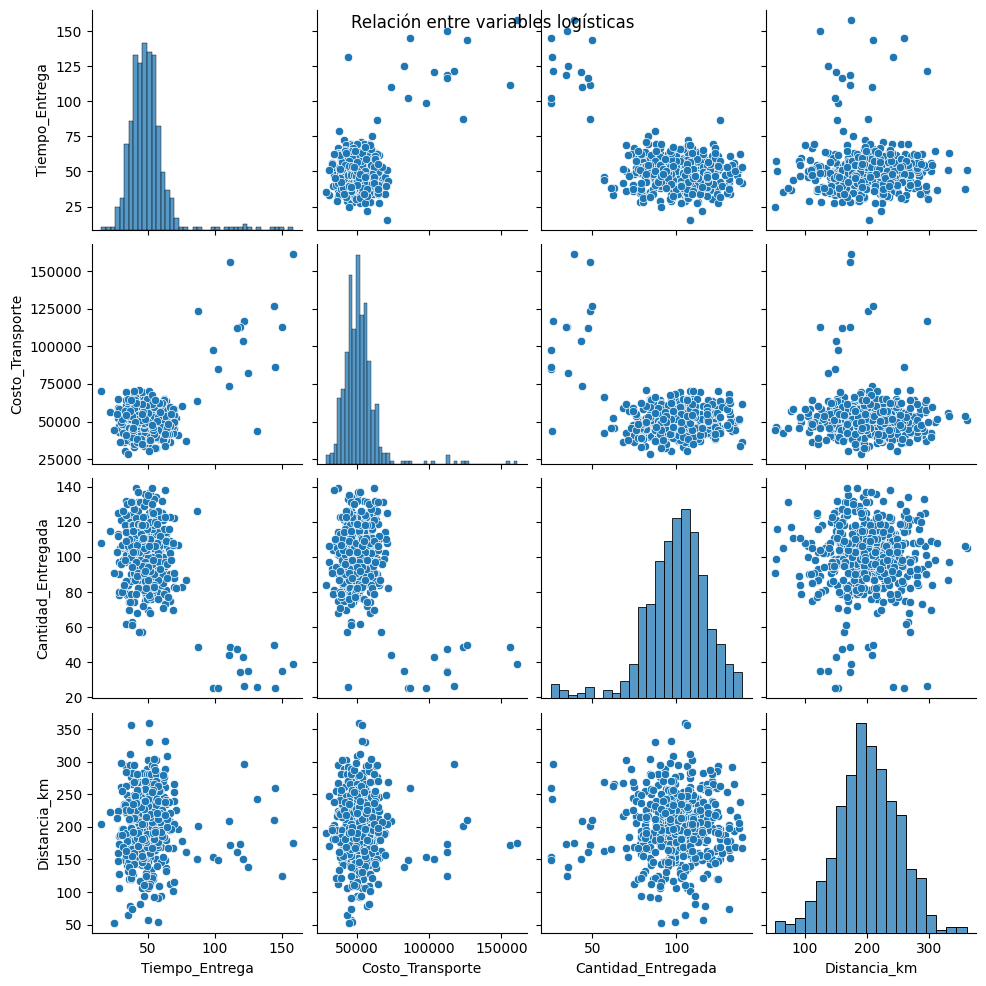

In [4]:
sns.pairplot(df.drop(columns=['ID_Transaccion']))
plt.suptitle('Relación entre variables logísticas')
plt.show()

## ⚙️ Paso 4: Estandarización y selección de variables

In [5]:
X = df[['Tiempo_Entrega', 'Costo_Transporte', 'Cantidad_Entregada', 'Distancia_km']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🌲 Paso 5: Detección con Isolation Forest

In [6]:
iso = IsolationForest(contamination=0.03, random_state=42)
df['Anomalia_IForest'] = iso.fit_predict(X_scaled)
df['Anomalia_IForest'] = df['Anomalia_IForest'].map({1: 0, -1: 1})  # 1 = anómalo
df['Anomalia_IForest'].value_counts()

,count
Anomalia_IForest,
0,485
1,15


## 🧠 Paso 6: Detección con Local Outlier Factor (LOF)

In [7]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
df['Anomalia_LOF'] = lof.fit_predict(X_scaled)
df['Anomalia_LOF'] = df['Anomalia_LOF'].map({1: 0, -1: 1})
df['Anomalia_LOF'].value_counts()

,count
Anomalia_LOF,
0,485
1,15


## 📈 Paso 7: Visualización de anomalías encontradas

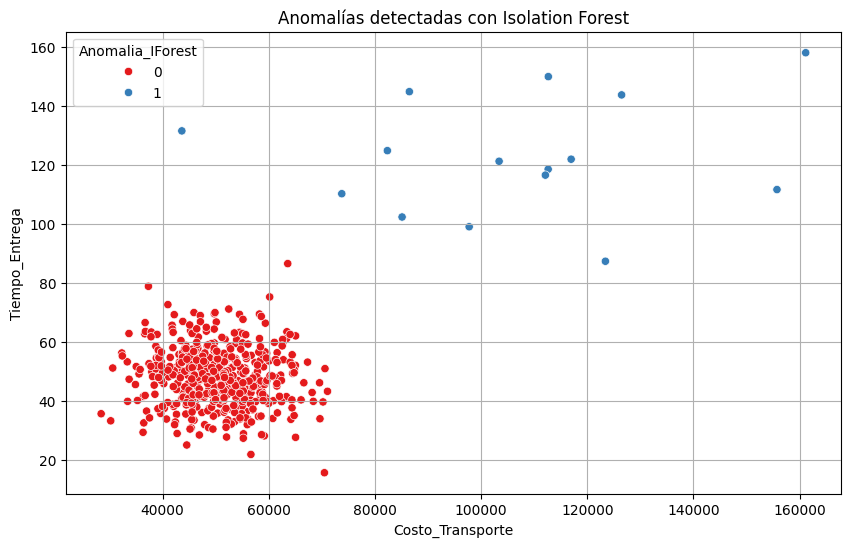

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Costo_Transporte', y='Tiempo_Entrega', data=df, hue='Anomalia_IForest', palette='Set1')
plt.title('Anomalías detectadas con Isolation Forest')
plt.grid(True)
plt.show()

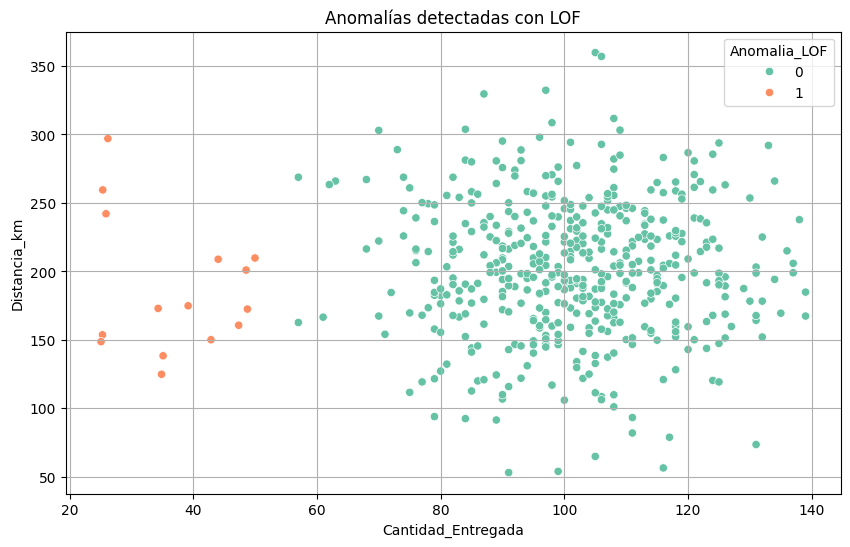

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cantidad_Entregada', y='Distancia_km', data=df, hue='Anomalia_LOF', palette='Set2')
plt.title('Anomalías detectadas con LOF')
plt.grid(True)
plt.show()

## 🧾 Paso 8: Listado de transacciones anómalas

In [10]:
df_anom = df[(df['Anomalia_IForest'] == 1) | (df['Anomalia_LOF'] == 1)]
df_anom[['ID_Transaccion', 'Tiempo_Entrega', 'Costo_Transporte', 'Cantidad_Entregada', 'Distancia_km']]

,ID_Transaccion,Tiempo_Entrega,Costo_Transporte,Cantidad_Entregada,Distancia_km
1,TXN_0002,111.6,155723.871346,48.760158,172.4
86,TXN_0087,110.2,73749.409900,44.032270,208.8
167,TXN_0168,158.0,161133.367433,39.176061,174.8
168,TXN_0169,131.5,43624.156754,25.899157,242.0
195,TXN_0196,121.9,116953.438316,26.202207,296.9
196,TXN_0197,121.2,103383.474124,42.874487,150.0
244,TXN_0245,99.0,97744.892857,25.328842,153.6
282,TXN_0283,149.9,112655.852836,34.876966,124.8
329,TXN_0330,87.3,123408.000133,48.549475,200.9
345,TXN_0346,102.3,85108.689984,25.094577,148.6
